# Financial News and Stock Price Integration Dataset - EDA
This notebook performs comprehensive Exploratory Data Analysis (EDA) on the FNSPID dataset.
## Dataset Description
- **headline**: Article release headline/title
- **url**: Direct link to the full news article
- **publisher**: Author/creator of article
- **date**: Publication date and time (UTC-4 timezone)
- **stock**: Stock ticker symbol

In [1]:
# Import required libraries
import sys
import os
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
# Import custom modules
from data_loader import FinancialDataLoader
from eda_analyzer import FinancialEDAAnalyzer
from utils import save_analysis_results, format_large_numbers, get_data_quality_report

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [2]:
# Initialize data loader
data_path = "../data/raw_analyst_ratings.csv"
loader = FinancialDataLoader(data_path)

# Load the dataset
print("Loading dataset...")
df = loader.load_data()
print(f"Dataset loaded successfully! Shape: {df.shape}")

INFO:data_loader:Loading data from ../data/raw_analyst_ratings.csv


Loading dataset...


INFO:data_loader:Data loaded successfully. Shape: (1407328, 6)


Dataset loaded successfully! Shape: (1407328, 6)


In [3]:
# Get basic dataset information
data_info = loader.get_data_info()
print("Dataset Information:")
print(f"Shape: {data_info['shape']}")
print(f"Columns: {data_info['columns']}")
print(f"Memory Usage: {data_info['memory_usage'] / (1024**2):.2f} MB")
print("Data Types:")
for col, dtype in data_info['dtypes'].items():
    print(f"  {col}: {dtype}")

Dataset Information:
Shape: (1407328, 6)
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
Memory Usage: 634.55 MB
Data Types:
  Unnamed: 0: int64
  headline: object
  url: object
  publisher: object
  date: object
  stock: object


In [4]:
# Display sample data
print("Sample Data:")
sample_data = loader.get_sample_data(5)
display(sample_data)

Sample Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 2. Data Quality Assessment

In [5]:
# Generate data quality report
quality_report = get_data_quality_report(df)
print("Data Quality Report:")
print(f"Total Rows: {format_large_numbers(quality_report['total_rows'])}")
print(f"Total Columns: {quality_report['total_columns']}")
print(f"Duplicate Rows: {format_large_numbers(quality_report['duplicate_rows'])}")
print(f"Memory Usage: {quality_report['memory_usage_mb']:.2f} MB")
print("Missing Values Analysis:")
for col, missing_info in quality_report['missing_values'].items():
    if missing_info['count'] > 0:
        print(f"  {col}: {format_large_numbers(missing_info['count'])} ({missing_info['percentage']}%)")
    else:
        print(f"  {col}: No missing values")

Data Quality Report:
Total Rows: 1.4M
Total Columns: 6
Duplicate Rows: 0
Memory Usage: 635.59 MB
Missing Values Analysis:
  Unnamed: 0: No missing values
  headline: No missing values
  url: No missing values
  publisher: No missing values
  date: No missing values
  stock: No missing values


## 3. Initialize EDA Analyzer and Perform Analysis

In [6]:
# Initialize EDA analyzer
analyzer = FinancialEDAAnalyzer(df)
print("EDA Analyzer initialized and data prepared successfully!")

INFO:eda_analyzer:Data preparation completed successfully


EDA Analyzer initialized and data prepared successfully!


## 4. Descriptive Statistics for Textual Lengths

In [8]:
# Get descriptive statistics
desc_stats = analyzer.get_descriptive_statistics()
print("Descriptive Statistics for Textual Lengths:")
print("=" * 50)
for text_type, stats in desc_stats.items():
    print(f"{text_type.replace('_', ' ').title()}:")
    print(f"  Count: {format_large_numbers(stats['count'])}")
    print(f"  Mean: {stats['mean']:.2f} characters")
    print(f"  Std: {stats['std']:.2f} characters")
    print(f"  Min: {stats['min']} characters")
    print(f"  Max: {stats['max']} characters")
    print(f"  Median: {stats['median']:.2f} characters")
    print(f"  Q1: {stats['q1']:.2f} characters")
    print(f"  Q3: {stats['q3']:.2f} characters")



Descriptive Statistics for Textual Lengths:
Headline Length:
  Count: 1.4M
  Mean: 73.12 characters
  Std: 40.74 characters
  Min: 3 characters
  Max: 512 characters
  Median: 64.00 characters
  Q1: 47.00 characters
  Q3: 87.00 characters
Url Length:
  Count: 1.4M
  Mean: 110.50 characters
  Std: 19.17 characters
  Min: 33 characters
  Max: 162 characters
  Median: 115.00 characters
  Q1: 94.00 characters
  Q3: 125.00 characters


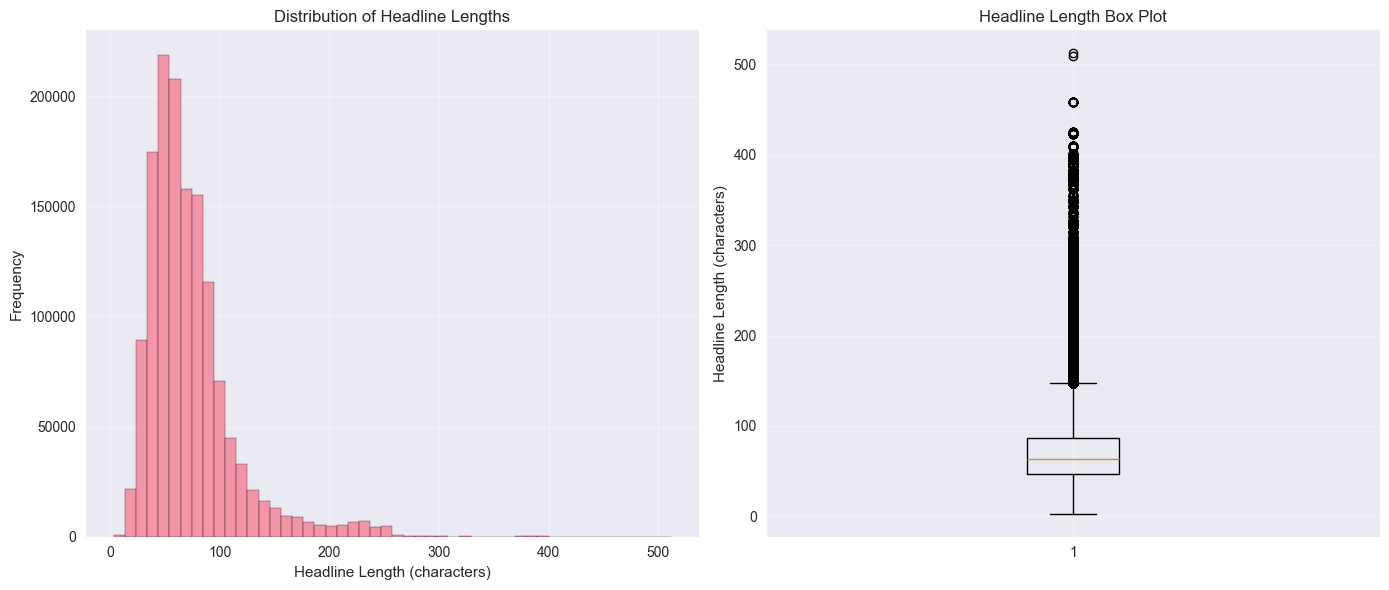

In [9]:
# Visualize headline length distribution
analyzer.plot_headline_length_distribution(figsize=(14, 6))

## 5. Publisher Analysis

In [11]:
# Analyze publishers
publisher_analysis = analyzer.analyze_publishers()
print("Publisher Analysis - Most Active Publishers:")
print("=" * 60)
print(f"Total Publishers: {len(publisher_analysis)}")
print(f"Total Articles: {format_large_numbers(publisher_analysis['article_count'].sum())}")
print("Top 15 Most Active Publishers:")
top_publishers = publisher_analysis.head(15)
for idx, row in top_publishers.iterrows():
    print(f"{idx+1:2d}. {row['publisher']:<30} | {format_large_numbers(row['article_count']):>8} articles ({row['percentage']:>5.2f}%)")

Publisher Analysis - Most Active Publishers:
Total Publishers: 1034
Total Articles: 1.4M
Top 15 Most Active Publishers:
 1. Paul Quintaro                  |   228.4K articles (16.23%)
 2. Lisa Levin                     |   187.0K articles (13.29%)
 3. Benzinga Newsdesk              |   150.5K articles (10.69%)
 4. Charles Gross                  |    96.7K articles ( 6.87%)
 5. Monica Gerson                  |    82.4K articles ( 5.85%)
 6. Eddie Staley                   |    57.3K articles ( 4.07%)
 7. Hal Lindon                     |    49.0K articles ( 3.49%)
 8. ETF Professor                  |    28.5K articles ( 2.02%)
 9. Juan Lopez                     |    28.4K articles ( 2.02%)
10. Benzinga Staff                 |    28.1K articles ( 2.00%)
11. Vick Meyer                     |    24.8K articles ( 1.76%)
12. webmaster                      |    20.3K articles ( 1.44%)
13. Benzinga_Newsdesk              |    19.4K articles ( 1.38%)
14. Zacks                          |    19.4K ar

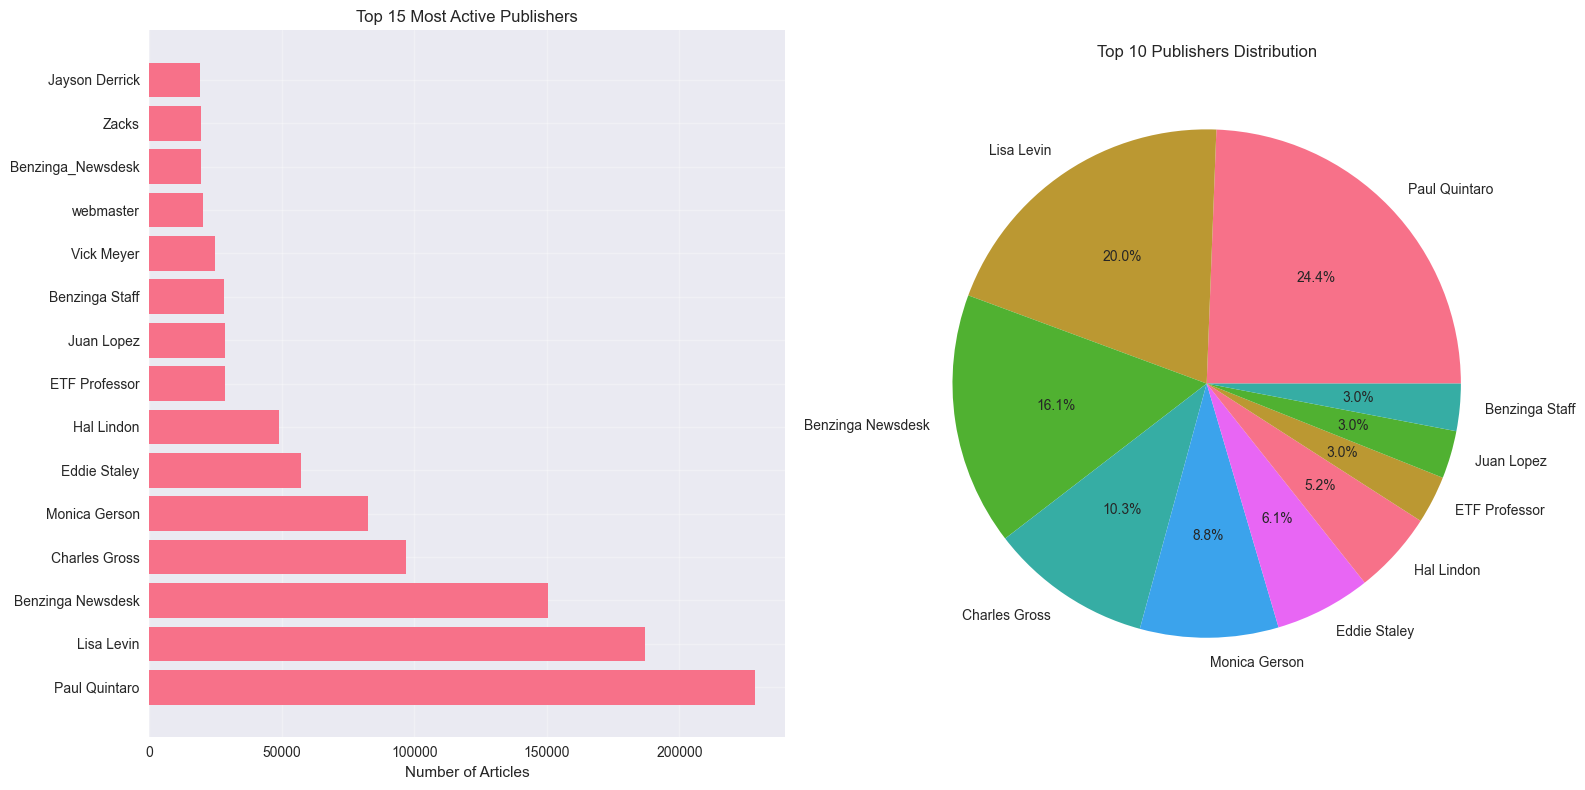

In [12]:
# Visualize publisher analysis
analyzer.plot_publisher_analysis(top_n=15, figsize=(16, 8))

## 6. Publication Date Trends Analysis

In [13]:
# Analyze publication trends
trends = analyzer.analyze_publication_trends()
print("Publication Trends Analysis:")
print("=" * 40)
# Day of week trends
print("Articles by Day of Week:")
dow_trends = trends['day_of_week_trends']
for _, row in dow_trends.iterrows():
    print(f"{row['day_of_week']:<10}: {format_large_numbers(row['article_count']):>8} articles")
# Find busiest and quietest days
busiest_day = dow_trends.loc[dow_trends['article_count'].idxmax()]
quietest_day = dow_trends.loc[dow_trends['article_count'].idxmin()]
print(f"Busiest Day: {busiest_day['day_of_week']} ({format_large_numbers(busiest_day['article_count'])} articles)")
print(f"Quietest Day: {quietest_day['day_of_week']} ({format_large_numbers(quietest_day['article_count'])} articles)")

Publication Trends Analysis:
Articles by Day of Week:
Monday    :    10.3K articles
Tuesday   :    11.0K articles
Wednesday :    11.9K articles
Thursday  :    12.7K articles
Friday    :     9.4K articles
Saturday  :      267 articles
Sunday    :      436 articles
Busiest Day: Thursday (12.7K articles)
Quietest Day: Saturday (267 articles)


In [16]:
# Hourly trends analysis
hourly_trends = trends['hourly_trends']
print("Articles by Hour of Day (Top 10 Active Hours):")
top_hours = hourly_trends.nlargest(10, 'article_count')
for _, row in top_hours.iterrows():
    hour_str = f"{int(row['hour']):02d}:00"
    print(f"{hour_str}: {format_large_numbers(row['article_count']):>8} articles")
# Peak hours
peak_hour = hourly_trends.loc[hourly_trends['article_count'].idxmax()]
low_hour = hourly_trends.loc[hourly_trends['article_count'].idxmin()]
print(f"Peak Hour: {int(peak_hour['hour']):02d}:00 ({format_large_numbers(peak_hour['article_count'])} articles)")
print(f"Lowest Hour: {int(low_hour['hour']):02d}:00 ({format_large_numbers(low_hour['article_count'])} articles)")

Articles by Hour of Day (Top 10 Active Hours):
10:00:     7.7K articles
09:00:     6.0K articles
12:00:     5.7K articles
11:00:     5.7K articles
08:00:     5.5K articles
07:00:     5.0K articles
16:00:     3.9K articles
17:00:     2.8K articles
13:00:     2.7K articles
06:00:     2.5K articles
Peak Hour: 10:00 (7.7K articles)
Lowest Hour: 01:00 (14.0 articles)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


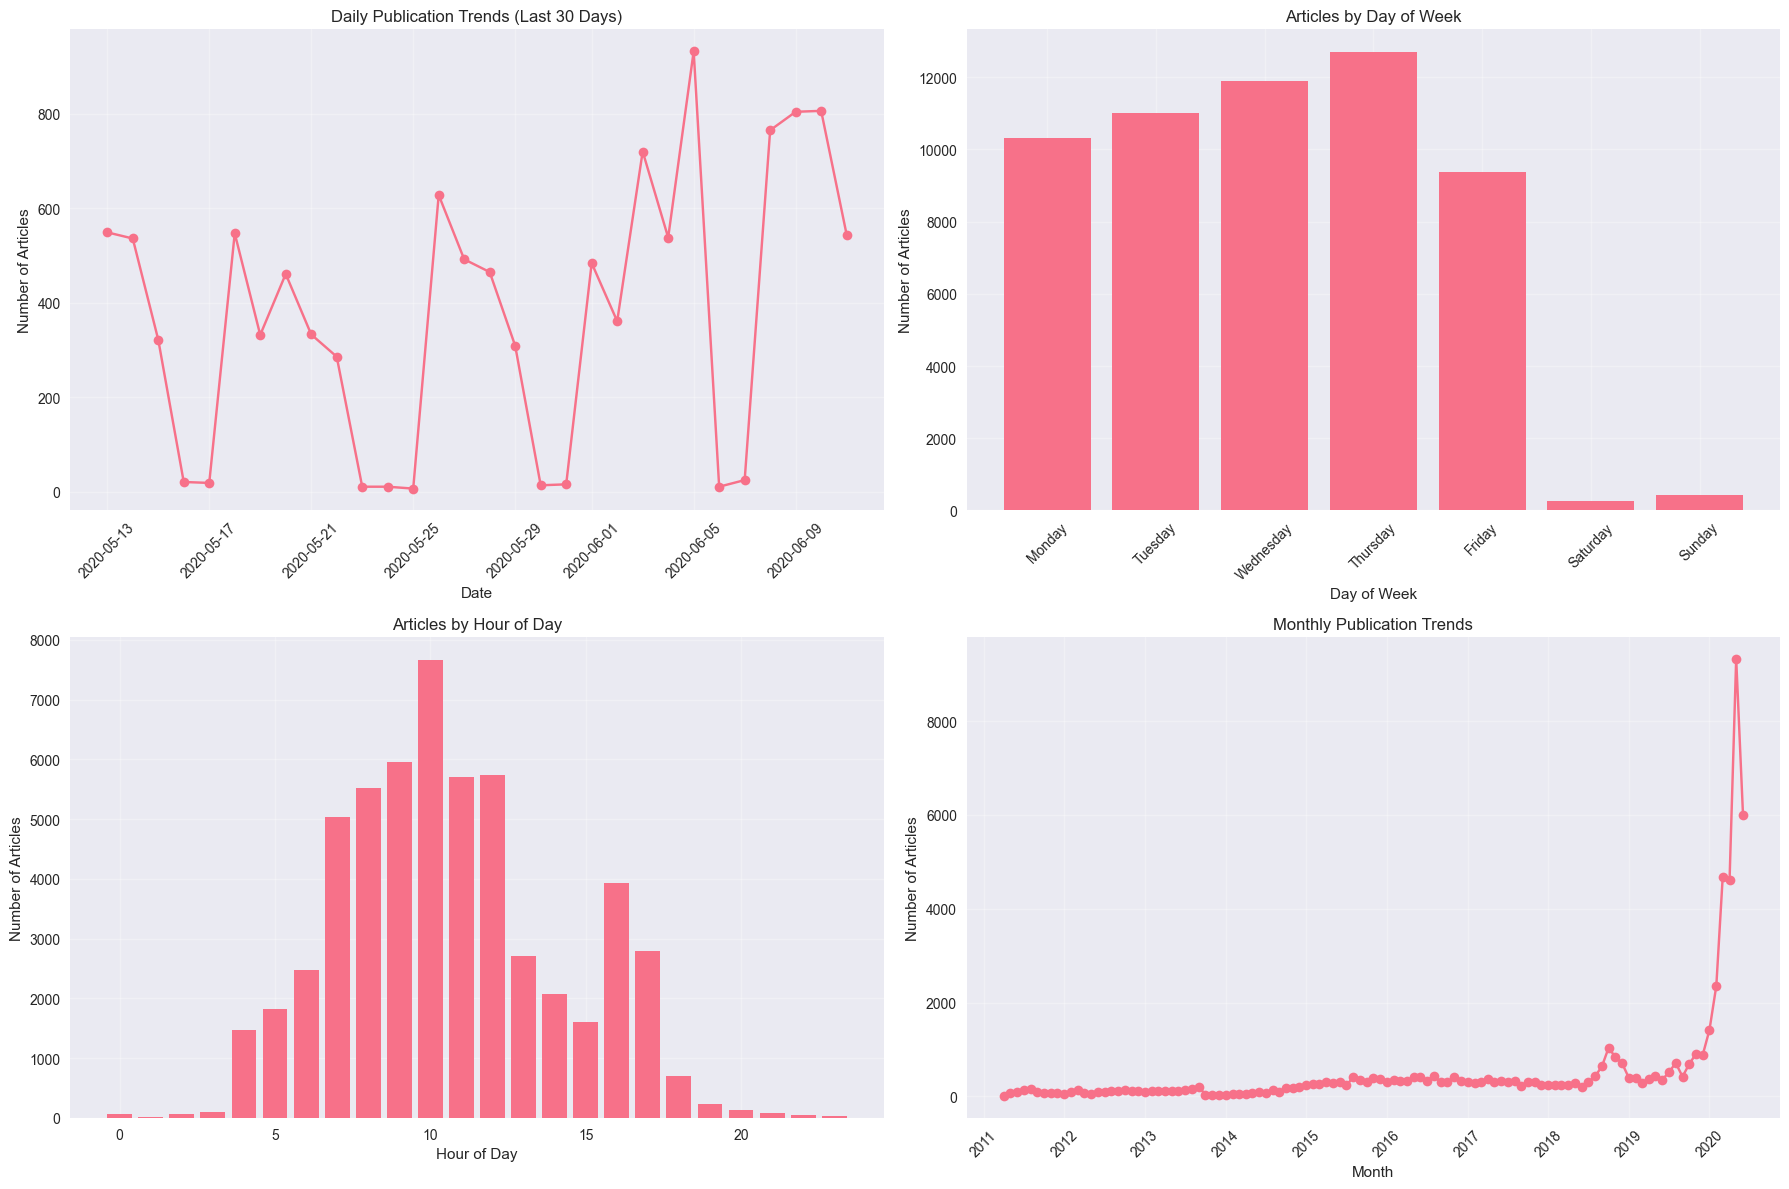

In [17]:
# Visualize temporal trends
analyzer.plot_temporal_trends(figsize=(18, 12))

## 7. Additional Analysis - Stock Symbol Distribution

Top 20 Most Mentioned Stocks:
 1. MRK      |     3.3K articles ( 0.24%)
 2. MS       |     3.2K articles ( 0.23%)
 3. NVDA     |     3.1K articles ( 0.22%)
 4. MU       |     3.1K articles ( 0.22%)
 5. QQQ      |     3.1K articles ( 0.22%)
 6. NFLX     |     3.0K articles ( 0.22%)
 7. M        |     3.0K articles ( 0.21%)
 8. EBAY     |     3.0K articles ( 0.21%)
 9. GILD     |     3.0K articles ( 0.21%)
10. VZ       |     3.0K articles ( 0.21%)
11. QCOM     |     2.9K articles ( 0.21%)
12. JNJ      |     2.9K articles ( 0.21%)
13. DAL      |     2.9K articles ( 0.21%)
14. BABA     |     2.9K articles ( 0.20%)
15. KO       |     2.8K articles ( 0.20%)
16. AA       |     2.7K articles ( 0.19%)
17. EWU      |     2.7K articles ( 0.19%)
18. ORCL     |     2.7K articles ( 0.19%)
19. FDX      |     2.6K articles ( 0.19%)
20. WFC      |     2.6K articles ( 0.19%)


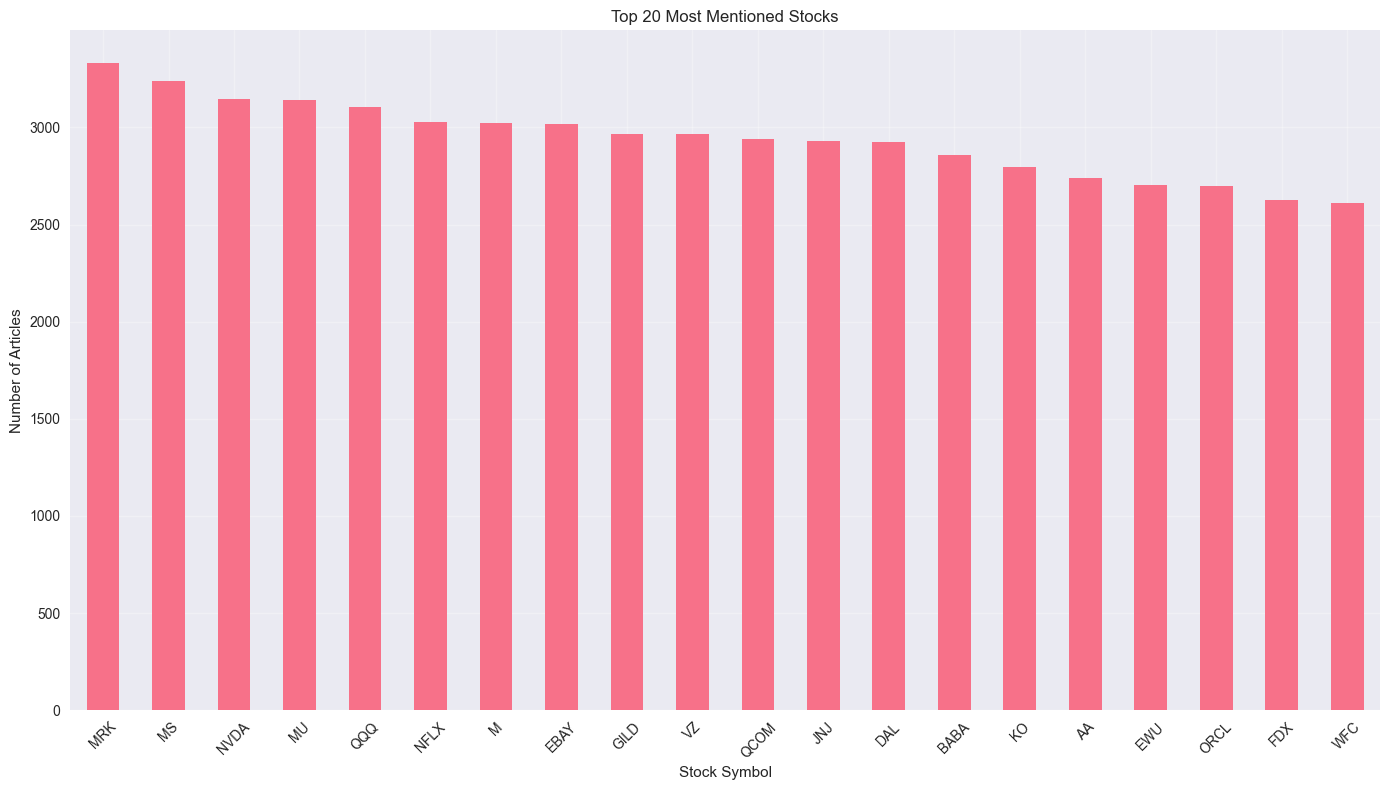

In [18]:
# Analyze stock symbol distribution
if 'stock' in df.columns:
    stock_counts = df['stock'].value_counts().head(20)
    print("Top 20 Most Mentioned Stocks:")
    print("=" * 35)
    for idx, (stock, count) in enumerate(stock_counts.items(), 1):
        percentage = (count / len(df)) * 100
        print(f"{idx:2d}. {stock:<8} | {format_large_numbers(count):>8} articles ({percentage:>5.2f}%)")
    # Plot top stocks
    plt.figure(figsize=(14, 8))
    stock_counts.plot(kind='bar')
    plt.title('Top 20 Most Mentioned Stocks')
    plt.xlabel('Stock Symbol')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Stock column not found in dataset")

## 8. Summary and Key Insights

In [20]:
# Generate comprehensive summary
summary = {
    'dataset_overview': {
        'total_articles': len(df),
        'total_publishers': len(df['publisher'].unique()) if 'publisher' in df.columns else 0,
        'date_range': {
            'start': str(df['date'].min()) if 'date' in df.columns else 'N/A',
            'end': str(df['date'].max()) if 'date' in df.columns else 'N/A'
        },
        'unique_stocks': len(df['stock'].unique()) if 'stock' in df.columns else 0
    },
    'text_statistics': desc_stats,
    'top_publishers': publisher_analysis.head(10).to_dict('records'),
    'temporal_insights': {
        'busiest_day': busiest_day['day_of_week'],
        'quietest_day': quietest_day['day_of_week'],
        'peak_hour': f"{int(peak_hour['hour']):02d}:00",
        'low_hour': f"{int(low_hour['hour']):02d}:00"
    }
}

# Save results
save_analysis_results(summary, '../data/results/eda_summary.json')

print("EDA Analysis Summary:")
print("=" * 30)
print(f"Total Articles: {format_large_numbers(summary['dataset_overview']['total_articles'])}")
print(f"Total Publishers: {format_large_numbers(summary['dataset_overview']['total_publishers'])}")
print(f"Unique Stocks: {format_large_numbers(summary['dataset_overview']['unique_stocks'])}")
print(f"Date Range: {summary['dataset_overview']['date_range']['start']} to {summary['dataset_overview']['date_range']['end']}")

print("\nTemporal Insights:")
print(f"Busiest Day: {summary['temporal_insights']['busiest_day']}")
print(f"Quietest Day: {summary['temporal_insights']['quietest_day']}")
print(f"Peak Publishing Hour: {summary['temporal_insights']['peak_hour']}")
print(f"Low Publishing Hour: {summary['temporal_insights']['low_hour']}")

print("\nAnalysis completed successfully! Results saved to '../data/results/eda_summary.json'")

EDA Analysis Summary:
Total Articles: 1.4M
Total Publishers: 1.0K
Unique Stocks: 6.2K
Date Range: 2009-02-14 00:00:00 to 2020-06-11 17:12:35-04:00

Temporal Insights:
Busiest Day: Thursday
Quietest Day: Saturday
Peak Publishing Hour: 10:00
Low Publishing Hour: 01:00

Analysis completed successfully! Results saved to '../data/results/eda_summary.json'
